# 10. Complex Numbers

We have by now constructed Taylor Series for the four main function of the universe; $\sin$, $\cos$, $\log$, and $\exp$.

We have also seen how Newton's Method makes repetitive use of Taylor's Formula to solve equations.

In this notebook we will see how complex numbers permit us to ***see*** $\sin$ and $\cos$ as pieces of $\exp$. This is a truly remarkable deduction - beautiful in its own right - but also pregnant with an infinite number of applications across science and engineering.

Complex numbers, like the log function, were invented to fill a simple gap.  The gap in this case is polynomials without roots.

You know that the roots of $x^2=c$ are $\pm\sqrt{c}$ so long as $c>0$. The "fundmamental gap" appears with the quandry

$$
  x^2 = -1?
$$

What number, when squared, becomes $-1$? There is no "real" answer to this question. It requires a leap of imagination to accept the definition of $j$, the imaginary unit, for which

$$
  j^2 = -1.
$$

Amazingly, filling this one gap for this one polynomial in fact fills the gap for ALL polynomials!

For example, the roots of $ax^2+bx+c$ are

$$
  \frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

so long as $b^2>4ac$. If instead $4ac>b^2$ our $j$ comes to the rescue, the roots being

$$
  \frac{-b\pm j\sqrt{4ac-b^2}}{2a}
$$

We call these number **complex** with **real part** 

$$
  \frac{-b}{2a}
$$

and **imaginary parts** 

$$
  \frac{\pm\sqrt{4ac-b^2}}{2a}.
$$

For example, the roots of $x^2-2x+3$ are
$$
  \frac{2 \pm \sqrt{4-12}}{2} = 1 \pm j \sqrt 2
$$

Let's check our understanding of this in python. We encode the polynomial $x^2-2x+3$ by the list of its coefficients (in decreasing powers) [1,-2,3]. We use the numpy method, roots, to find its roots.

In [3]:
import numpy as np
np.roots([1,-2,3])

array([1.+1.41421356j, 1.-1.41421356j])

## Complex Arithmetic

Given two complex numbers, 

$$
  z_1 = x_1 + j y_1 \hskip 0.25in\hbox{and}\hskip 0.25in z_2 = x_2 + j y_2
$$

we now define their **sum** (using the dictate - stay in your lane!)

$$
  z_1 + z_2 = (x_1+x_2) + j(y_1+y_2), \hskip 0.25in\hbox{for example}\hskip 0.25in (2+3j)+(4+5j) = 6+8j
$$

their **difference** (using the dictate - stay in your lane!)

$$
  z_1 - z_2 = (x_1-x_2) + j(y_1-y_2), \hskip 0.25in\hbox{for example}\hskip 0.25in (2+3j)-(4+5j) = -2-2j
$$

their **product** (using FOIL)

$$
  z_1z_2 = (x_1+jy_1)(x_2+jy_2) = (x_1x_2-y_1y_2) + j(x_1y_2+x_2y_1), \hskip 0.25in\hbox{for example}\hskip 0.25in (2+3j)(4+5j) = -7+22j
$$

and their **quotient** (using FOIL and downstairs conjugate to get real denominator)

$$
  \frac{z_1}{z_2} = \frac{x_1+jy_1}{x_2+jy_2} = \frac{x_1+jy_1}{x_2+jy_2}\frac{x_2-jy_2}{x_2-jy_2} = 
    \frac{(x_1x_2+y_1y_2)+j(y_1x_2-x_1y_2)}{x_2^2+y_2^2}
    \hskip 0.25in\hbox{for example}\hskip 0.25in \frac{2+3j}{4+5j} = \frac{23+2j}{41}
$$

This is all fairly mechanical, and easily checked in python

In [5]:
z1 = 2+3j
z2 = 4+5j
print('z1 + z2 = ', z1+z2)
print('z1 - z2 = ', z1-z2)
print('z1 * z2 = ', z1*z2)
print('z1 / z2 = ', np.round(z1/z2,3))

z1 + z2 =  (6+8j)
z1 - z2 =  (-2-2j)
z1 * z2 =  (-7+22j)
z1 / z2 =  (0.561+0.049j)


To get beyond the mechanical and ***see*** complex numbers we rethink the $(x,y)$ plane and use the $x$-axis for the real part and $y$ for the imaginary part of the complex number

$$
  z = x + yj
$$

This defines a right triangle and so gives us a way to think about the ***magnitude*** 

$$
  |z| \equiv \sqrt{x^2+y^2}
$$

and ***phase*** 

$$
  \angle z = \tan^{-1}(y/x)
$$

We illustrate this below

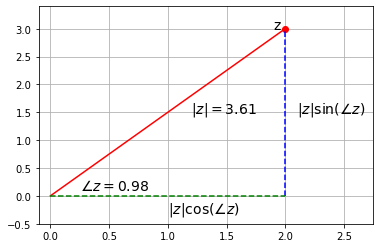

In [31]:
import matplotlib.pyplot as plt

z = 2 + 3j
plt.plot(z.real, z.imag, 'ro')
plt.plot([0, z.real],[0, z.imag],'r')
plt.text(z.real-0.1,z.imag,'z', fontsize=14)
plt.text(1.2,1.5,'$|z| = $' + str(round(abs(z),2)), fontsize=14)
plt.text(.25,0.1,'$\\angle z = $' + str(round(np.arctan2(z.imag,z.real),2)), fontsize=14)
plt.plot([z.real, z.real],[0, z.imag], 'b--')
plt.text(z.real+.1, z.imag/2, '$|z|\\sin(\\angle z)$', fontsize=14)
plt.plot([0, z.real],[0, 0], 'g--')
plt.text(z.real/2, -.3, '$|z|\\cos(\\angle z)$', fontsize=14)
plt.xlim([-.1, 2.75])
plt.ylim([-.5, 3.4])
plt.grid('on')

## Euler's Formula

We have seen that we can do arithmetic with complex numbers. It follows that we can then consider functions of complex numbers. Of course we should begin with $\exp$. We borrow the Taylor Series you constructed for the **real** $\exp$

$$
  \exp(z) = \sum_{n=0}^\infty \frac{z^n}{n!}
$$

and ask what happens when $z=tj$ is purely imaginary (here $t$ is real). Well

$$
  \exp(tj) = \sum_{n=0}^\infty \frac{(tj)^n}{n!} = \sum_{n=0}^\infty \frac{t^nj^n}{n!}
$$

This falls into lovely pieces based on the lovely sequence of facts

$$
  j^2 = -1, \hskip 0.25in j^3 = -j, \hskip 0.25in j^4 = 1, \hskip 0.25in j^5 = j, \hskip 0.25in j^6 = -1, \ldots
$$

Using this sequence in our $\exp$ formula yields

$$
  \exp(tj) = 1 + tj - \frac{t^2}{2} - \frac{t^3j}{3!} + \frac{t^4}{4!} + \frac{t^5j}{5!} - \frac{t^6}{6!} - \frac{t^7j}{7!} + \cdots
$$

The magic happens when we now group the real and imaginary parts

$$
 \exp(tj) = \left(1 - \frac{t^2}{2} + \frac{t^4}{4!}  - \frac{t^6}{6!}  + \cdots\right) +
   j\left(t - \frac{t^3}{3!} + \frac{t^5}{5!} - \frac{t^7}{7!} + \cdots\right)
$$

Finally, with Euler we recognize these two Taylor Series and arrive at

$$
  \boxed{\exp(tj) = \cos(t) + j\sin(t)}  \tag{EF}
$$

We will use the exercises to explore some of the coolest consequences.

## Homework 10.

Complete the following in a jupyter notebook. Show all of your work, and check your work in python cells.

1. Find two nonzero complex numbers whose sum is 2-3j

2. Find two nonzero complex numbers whose difference is 2-3j

3. Find two nonzero complex numbers whose product is 2-3j

4. Find two nonzero complex numbers whose quotient is 2-3j

5. Find the magnitude and angle of 2-3j

6. Show that the identity $\exp(aj)\exp(bj)=\exp((a+b)j)$ yields **both** coco-sisi and sico+sico.

7. Expand, via (EF)
$$
  \frac{\exp(jt)+\exp(-jt)}{2}
$$
and rediscover an old friend.

8. Expand, via (EF)
$$
  \frac{\exp(jt)-\exp(-jt)}{2j}
$$
and rediscover an old friend.